In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

### Data Pre-processing

In [2]:
dataset = pd.read_csv('E:\College Education\sem 5\MPI\Breast Cancer Dataset.csv',index_col=0)
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [3]:
print("Features : ",dataset.columns)

Features :  Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
df = dataset.copy()
print("Missing Values \n",df.isnull().sum())

Missing Values 
 diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32           

In [5]:
df = df.drop(columns=df.columns[-1])
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [6]:
x = df.iloc[:,:-1].values
y = df['fractal_dimension_worst'].values.reshape(-1,1)
print("x shape",x.shape)
print("y shape :",y.shape)

x shape (569, 30)
y shape : (569, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [8]:
binarizer = LabelBinarizer()
x[:,0] = binarizer.fit_transform(x[:,0]).flatten()

In [9]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x.astype('float'))
y = scaler.fit_transform(y)

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15,random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 

### Model Fitting

In [12]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [13]:
ypred = scaler.inverse_transform(lin_reg.predict(xtest))
print("A Sample of Predictions: \n",ypred[:10])

A Sample of Predictions: 
 [[0.08057632]
 [0.07192115]
 [0.07052565]
 [0.0815635 ]
 [0.05971667]
 [0.06860971]
 [0.1028894 ]
 [0.08212095]
 [0.07237955]
 [0.08898847]]


### Generalisation Error

In [14]:
train_mse = {'lin_reg':mse(scaler.inverse_transform(ytrain),
                           scaler.inverse_transform(lin_reg.predict(xtrain)))}
test_mse = {'lin_reg':mse(scaler.inverse_transform(ytest),ypred)}

In [15]:
print("Training MSE : {:.7f}".format(train_mse['lin_reg']))
print("Generalisation Error: {:.7f}".format(test_mse['lin_reg']))

Training MSE : 0.0000159
Generalisation Error: 0.0000280


### Bias-variance Tradeoff

In [16]:
bias = []
variance = []
for i in range(100,len(xtrain)):
    xdata = xtrain[:i,:];ydata = ytrain[:i,:]
    model = LinearRegression(n_jobs=-1)
    model.fit(xdata,ydata)
    bias.append(mse(scaler.inverse_transform(ydata),
                           scaler.inverse_transform(lin_reg.predict(xdata))))
    variance.append(abs(bias[-1]-mse(scaler.inverse_transform(ytest),
                           scaler.inverse_transform(lin_reg.predict(xtest)))))

In [17]:
bias = pd.Series(data=bias,index=range(100,len(xtrain)))
variance = pd.Series(data=variance,index=range(100,len(xtrain)))
diff = pd.Series(data=abs((bias-variance))
                 ,index=range(100,len(xtrain)))

In [18]:
print("The Training datasize with lowest bias and variance is : {}".format(diff.idxmin()))

The Training datasize with lowest bias and variance is : 207


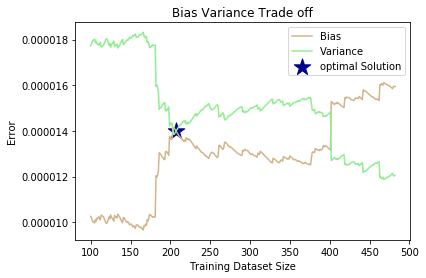

In [19]:
plt.plot(range(100,len(xtrain)),bias,label='Bias',color='tan')
plt.plot(range(100,len(xtrain)),variance,label='Variance',color='lightgreen')
plt.scatter(diff.idxmin(),bias[diff.idxmin()],marker='*',color='darkblue',s=300,label='optimal Solution')
plt.legend()
plt.title('Bias Variance Trade off')
plt.ylabel('Error')
plt.xlabel('Training Dataset Size')
plt.show()

### Cross Validation

In [20]:
from sklearn.model_selection import cross_validate

In [21]:
cv_results = cross_validate(lin_reg,x,y,cv=10,n_jobs=-1,scoring='neg_mean_squared_error',return_train_score=True)

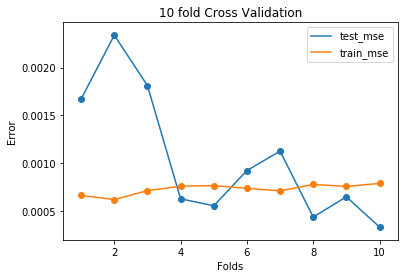

In [22]:
plt.plot(range(1,len(cv_results['test_score'])+1),abs(cv_results['test_score']),label='test_mse')
plt.scatter(range(1,len(cv_results['test_score'])+1),abs(cv_results['test_score']))
plt.plot(range(1,len(cv_results['train_score'])+1),abs(cv_results['train_score']),label='train_mse')
plt.scatter(range(1,len(cv_results['train_score'])+1),abs(cv_results['train_score']))
plt.title('10 fold Cross Validation')
plt.xlabel('Folds')
plt.ylabel('Error')
plt.legend()
plt.show()

In [23]:
print("Average Train error : ",np.array(abs(cv_results['train_score'])).mean())
print("Average test error : ",np.array(abs(cv_results['test_score'])).mean())

Average Train error :  0.0007264427580041986
Average test error :  0.001045172790649945


### Feature Subset Selection

In [24]:
from sklearn.linear_model import ElasticNet

In [25]:
ela_reg = ElasticNet()
ela_reg.fit(xtrain,ytrain)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
train_mse['ela_reg'] = mse(scaler.inverse_transform(ytrain),
                           scaler.inverse_transform(ela_reg.predict(xtrain).reshape(-1,1)))
test_mse['ela_reg'] = mse(scaler.inverse_transform(ytest),
                           scaler.inverse_transform(ela_reg.predict(xtest).reshape(-1,1)))

In [27]:
print("Train mse : ",train_mse['ela_reg'])
print("Test mse : ",test_mse['ela_reg'])

Train mse :  0.00033033873975112413
Test mse :  0.00030035971812840786


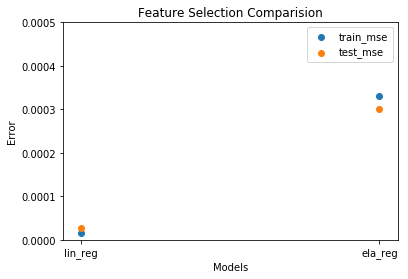

In [28]:
plt.scatter(train_mse.keys(),train_mse.values(),label='train_mse')
plt.scatter(test_mse.keys(),test_mse.values(),label='test_mse')
plt.ylim(0,0.0005)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Models')
plt.title('Feature Selection Comparision')
plt.show()

In [29]:
print("Train_mse : ",train_mse)
print("Test_mse : ",test_mse)

Train_mse :  {'lin_reg': 1.5910146955877265e-05, 'ela_reg': 0.00033033873975112413}
Test_mse :  {'lin_reg': 2.7985396662453613e-05, 'ela_reg': 0.00030035971812840786}
